In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential, Model, model_from_json
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
%matplotlib inline

Using TensorFlow backend.


In [ ]:
import MySQLdb

db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="Priya@1985",  # your password
                     db="Facial_Recognition")        # name of the data base

cur = db.cursor()





In [8]:
import PIL
from PIL import Image

In [10]:
import os
import cv2
import random
import pandas as pd


location = os.getcwd() # get present working directory location here
images_dir = '\images'
location = location+images_dir
print(location)
counter = 0

for file in os.listdir(location):
    try:
        if file.endswith(".jpg"):
            print("jpg file found:\t", file)
            basewidth = 96
            print(file)
            image_loc = os.path.join(location, file)
            img = Image.open(image_loc)
            wpercent = (basewidth / float(img.size[0]))
            hsize = int((float(img.size[1]) * float(wpercent)))
            img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
            img.save('images/resized_image.jpg')    
            os.remove(image_loc)
            
            im = cv2.imread('images/resized_image.jpg',cv2.IMREAD_GRAYSCALE)
            im = im.tolist()
            im = sum(im, [])
            #print(len(im))
            Image = ' '.join(str(x) for x in im)
            #print(values)
            
            ImageId = random.randint(1,10000)
            image_dict =  pd.DataFrame({'ImageId': [ImageId], 'Image': [Image]})


            result_df = pd.DataFrame(image_dict, )
            print(result_df)
            result_df.to_csv("test.csv", index=False, mode = 'a' ,header= False,columns=["ImageId", "Image"])
           
                    
    except Exception as e:
        raise e
        print("No files found here!")
         

C:\Users\priyata\Desktop\Aegis_My_Work\Project Work\images
jpg file found:	 pic1.jpg
pic1.jpg
   ImageId                                              Image
0     1362  253 253 254 254 254 255 255 255 255 255 255 25...


In [11]:
def load(test=False, cols=None):
    
    fname = "test.csv" if test else "training.csv"
    df = pd.read_csv(fname)
    
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
    
    if cols:
        df = df[list(cols)+['Image']]
    
    #print( df.count())
    df = df.dropna()
    columns = df.columns
    
    X = np.vstack(df['Image'].values)#/255
    X = X.astype(np.float32)
    
    if not test:
        y = df[df.columns[:-1]].values
        #y = (y-48)/48
        X, y = shuffle(X, y, random_state=20)
        y = y.astype(np.float32)
    else:
        y = None
        columns = None
    
    return X, y, columns

def load2d(test=False, cols=None):
    
    X, y, columns = load(test, cols)
    X = X.reshape(-1,96,96, 1)
    
    return X, y, columns

In [12]:
X, y, columns = load2d(test=False)
columns = np.array(list(columns[:-1]))
columns

array(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y',
       'mouth_right_corner_x', 'mouth_right_corner_y',
       'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y'],
      dtype='<U25')

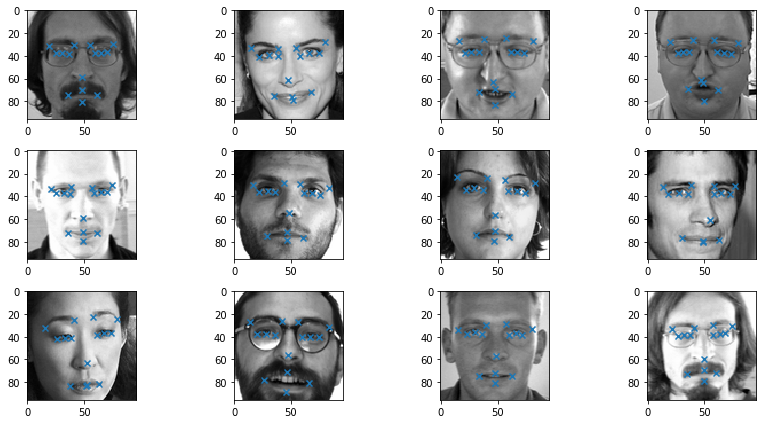

In [44]:
import seaborn as sns
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(X[i, :, :, 0], cmap="gray")
    plt.scatter(y[i, range(0, 30, 2)], y[i, range(1, 30, 2)], marker='x')

plt.tight_layout()
plt.show()

In [14]:
X_test, _, __ = load2d(test=True)
X_test.shape
print(X_test)

[[[[253.]
   [253.]
   [254.]
   ...
   [255.]
   [255.]
   [255.]]

  [[251.]
   [251.]
   [252.]
   ...
   [255.]
   [255.]
   [255.]]

  [[249.]
   [249.]
   [249.]
   ...
   [255.]
   [255.]
   [255.]]

  ...

  [[144.]
   [ 94.]
   [ 45.]
   ...
   [ 41.]
   [ 42.]
   [ 43.]]

  [[115.]
   [140.]
   [115.]
   ...
   [ 41.]
   [ 43.]
   [ 44.]]

  [[134.]
   [157.]
   [146.]
   ...
   [ 41.]
   [ 44.]
   [ 46.]]]


 [[[253.]
   [253.]
   [254.]
   ...
   [255.]
   [255.]
   [255.]]

  [[251.]
   [251.]
   [252.]
   ...
   [255.]
   [255.]
   [255.]]

  [[249.]
   [249.]
   [249.]
   ...
   [255.]
   [255.]
   [255.]]

  ...

  [[144.]
   [ 94.]
   [ 45.]
   ...
   [ 41.]
   [ 42.]
   [ 43.]]

  [[115.]
   [140.]
   [115.]
   ...
   [ 41.]
   [ 43.]
   [ 44.]]

  [[134.]
   [157.]
   [146.]
   ...
   [ 41.]
   [ 44.]
   [ 46.]]]


 [[[253.]
   [253.]
   [254.]
   ...
   [255.]
   [255.]
   [255.]]

  [[251.]
   [251.]
   [252.]
   ...
   [255.]
   [255.]
   [255.]]

  [[249.]
   [24

In [15]:
model = Sequential()

model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Conv2D(24, 5, data_format="channels_last", kernel_initializer="he_normal", 
                 input_shape=(96, 96, 1), padding="same"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(36, 5))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(48, 5))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, 3))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(90))
model.add(Activation("relu"))

model.add(Dense(30))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 24)        624       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 24)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 36)        21636     
_________________________________________________________________
activation_2 (Activation)    (None, 44, 44, 36)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 36)        0         
__________

In [ ]:
# save best weights
checkpointer = ModelCheckpoint(filepath='face_model.h5', verbose=1, save_best_only=True)

# num epochs
epochs = 400

# run model
hist = model.fit(X, y, epochs=epochs, 
                 validation_split=0.2, callbacks=[checkpointer], verbose=2)

# save model to json
model_json = model.to_json()
with open("face_model.json", "w") as json_file:
    json_file.write(model_json)

In [20]:
model.load_weights("face_model.h5")
y_test = model.predict(X_test)
y_test = y_test%96
print(y_test)


[[67.13884  37.603676 33.932495 41.71638  60.775635 39.292244 71.381874
  37.37866  39.045677 40.67758  28.18572  42.299362 55.76997  31.57463
  76.52562  30.628548 39.75231  34.06689  21.989187 36.157047 48.36096
  55.785637 66.30282  72.91788  39.288372 73.947    50.37771  68.90932
  52.54517  81.1291  ]
 [67.13877  37.60164  33.933327 41.71574  60.77617  39.29149  71.38144
  37.37751  39.04653  40.676174 28.188238 42.297867 55.770115 31.572859
  76.52282  30.625477 39.75273  34.066006 21.99076  36.156246 48.36315
  55.78078  66.303085 72.91642  39.29106  73.94567  50.37826  68.90597
  52.54648  81.12813 ]
 [67.13877  37.60164  33.933327 41.71574  60.77617  39.29149  71.38144
  37.37751  39.04653  40.676174 28.188238 42.297867 55.770115 31.572859
  76.52282  30.625477 39.75273  34.066006 21.99076  36.156246 48.36315
  55.78078  66.303085 72.91642  39.29106  73.94567  50.37826  68.90597
  52.54648  81.12813 ]
 [67.12691  37.612225 33.92359  41.708054 60.763447 39.293087 71.37841
  37.

In [ ]:
id_lookup_frame = pd.read_csv("IdLookupTable.csv")
val_reqrd = id_lookup_frame[["ImageId", "FeatureName"]]
val_reqrd.head()

In [ ]:
y_res = []
j = 0
k = 0
m = 0
for i in range(1, 1784):
    img = np.array(val_reqrd[val_reqrd["ImageId"]==i])
    if img.shape[0] == 30:
        y_res += list(y_test[i-1,:])
        j += 30
    else:
        slice_img = y_test[i-1, :]
        y_res += [slice_img[j] for j in range(30) if columns[j] in img[:, 1]]
        k += len([slice_img[j] for j in range(30) if columns[j] in img[:, 1]])
y_res = np.array(y_res)
y_res.shape

In [ ]:
result_dict = {
    "RowId": range(1,27125),
    "Location": y_res%96
}
result_df = pd.DataFrame(result_dict, )
result_df
#result_df.to_csv("result.csv", index=False, columns=["RowId", "Location"])

IndexError: index 4 is out of bounds for axis 0 with size 4

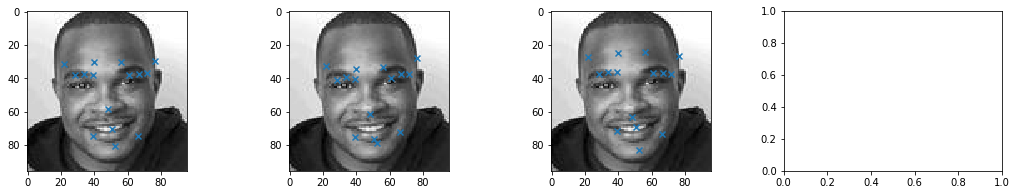

In [47]:
import seaborn as sns
plt.figure(0, figsize=(18,10))
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.imshow(X_test[i, :, :, 0], cmap="gray")
    plt.scatter(y_test[i, range(0, 30, 2)], y[i, range(1, 30, 2)], marker='x')

plt.tight_layout()
plt.show()